<a href="https://colab.research.google.com/github/NirantK/Hinglish/blob/stack/Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  f1_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.multiclass import OutputCodeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

In [0]:
df_BERT_64= pd.read_csv("/content/drive/My Drive/BERT_valid64.csv")
df_BERT_649= pd.read_csv("/content/drive/My Drive/BERT_valid64_9.csv")
df_BERT_65= pd.read_csv("/content/drive/My Drive/BERT_valid65.csv")
df_DistilBERT_64= pd.read_csv("/content/drive/My Drive/DistilBERT_valid64_1.csv")
df_DistilBERT_65= pd.read_csv("/content/drive/My Drive/DistilBERT_valid65.csv")


In [0]:
l = pd.read_csv("test_labels_hinglish.txt")

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_BERT_64["actual"])
y = le.transform(df_BERT_64["actual"])


In [0]:
df = pd.DataFrame()
df["BERT_64_negative"] = df_BERT_64["proba_negative"]
df["BERT_64_neutral"] = df_BERT_64["proba_neutral"]
df["BERT_64_positive"] = df_BERT_64["proba_positive"]
# df["BERT_64_sentiment"] = le.transform(df_BERT_64["Sentiment"])


df["BERT_649_negative"] = df_BERT_649["proba_negative"]
df["BERT_649_neutral"] = df_BERT_649["proba_neutral"]
df["BERT_649_positive"] = df_BERT_649["proba_positive"]
# df["BERT_649_sentiment"] = le.transform(df_BERT_649["Sentiment"])

df["BERT_65_negative"] = df_BERT_65["proba_negative"]
df["BERT_65_neutral"] = df_BERT_65["proba_neutral"]
df["BERT_65_positive"] = df_BERT_65["proba_positive"]
# df["BERT_65_sentiment"] = le.transform(df_BERT_65["Sentiment"])

# df["DistilBERT_64_negative"] = df_DistilBERT_64["proba_negative"]
# df["DistilBERT_64_neutral"] = df_DistilBERT_64["proba_neutral"]
# df["DistilBERT_64_positive"] = df_DistilBERT_64["proba_positive"]
# df["DistilBERT_64_sentiment"] = le.transform(df_DistilBERT_64["Sentiment"])

df["DistilBERT_65_negative"] = df_DistilBERT_65["proba_negative"]
df["DistilBERT_65_neutral"] = df_DistilBERT_65["proba_neutral"]
df["DistilBERT_65_positive"] = df_DistilBERT_65["proba_positive"]
# df["DistilBERT_64_sentiment"] = le.transform(df_DistilBERT_64["Sentiment"])


In [6]:
df

,BERT_64_negative,BERT_64_neutral,BERT_64_positive,BERT_649_negative,BERT_649_neutral,BERT_649_positive,BERT_65_negative,BERT_65_neutral,BERT_65_positive,DistilBERT_65_negative,DistilBERT_65_neutral,DistilBERT_65_positive
0,-0.917023,0.848260,-0.051328,0.209021,0.352510,-0.177959,-0.294714,1.080749,-0.384878,-0.695175,1.094967,-0.102838
1,-1.819198,-0.355091,2.747333,-2.425666,-0.418156,2.154119,-2.254908,-0.240274,2.648540,-2.401496,-0.156448,2.381583
2,0.718215,0.099927,-0.937183,1.488221,-0.056952,-1.003402,1.199084,0.062261,-0.928962,0.039550,0.890880,-0.715390
3,0.274513,1.194077,-1.450490,-0.487120,1.090277,-0.464433,-0.684138,1.359785,-0.733373,-1.132596,1.956391,-0.537584
4,1.021685,0.378019,-1.692840,0.090764,1.088896,-1.045575,1.926701,-0.365329,-1.640216,0.409683,1.072245,-1.329250
...,...,...,...,...,...,...,...,...,...,...,...,...
3395,0.926643,0.360316,-1.596923,0.649896,0.637028,-0.925685,1.940947,-0.373891,-1.447588,1.003608,0.185675,-0.828389
3396,1.203240,-0.541484,-0.769724,0.352287,0.630015,-0.651350,0.191140,0.480588,-0.406958,1.122909,0.121761,-0.816524
3397,1.340941,-0.047205,-1.771406,0.316862,0.951470,-1.014989,1.136088,0.163875,-1.510247,2.516004,-0.581253,-1.438948
3398,0.969914,-0.039714,-0.989335,1.773173,-0.186627,-1.019375,1.853034,-0.304274,-1.521759,1.919484,-0.148285,-1.214098


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.33, random_state=42)
X = df 

In [0]:
# clas = [
#         KNeighborsClassifier(n_neighbors=15),
#         LogisticRegression(C=0.1, multi_class="auto"), 
#         SGDClassifier(average=True, max_iter=1000), 
#         LogisticRegression(solver='sag', tol=1e-1, C=1.0, multi_class="auto"),
#         LogisticRegression(solver='newton-cg', tol=1e-1, C=1.0, multi_class="auto"),
#         LogisticRegression(solver='liblinear', penalty='l2', multi_class="auto"),
#         LogisticRegression(solver='liblinear', C=10, penalty='l2', multi_class="auto"),
#         LogisticRegression(solver='liblinear', penalty='l1', multi_class="auto"),
#         LogisticRegression(solver='saga', multi_class="auto"),
#         ]

# for m in clas:
#     m.fit(X_train, y_train)
#     predicted = m.predict(X_test)

#     f1 = f1_score(y_test, predicted, average="macro") 
#     print(f"F1: {f1}\n\n{str(m)}\n")

In [9]:
m = LogisticRegression(C =10, solver='liblinear', penalty='l2', multi_class="auto")
m.fit(X_train, y_train)
predicted = m.predict(X_test)
f1 = f1_score(y_test, predicted, average="macro") 
print(f"F1: {f1}\n\n{str(m)}\n")

F1: 0.6700513538748835

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)



In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('classifier' , LogisticRegression())])

# Create param grid.

param_grid = [
    {'classifier' : [LogisticRegression()],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-40, 40, 20),
    'classifier__solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
]

# Create grid search object

clf = GridSearchCV(pipe, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)
predicted = best_clf.predict(X_test)
f1 = f1_score(y_test, predicted, average="macro") 
print(f"F1: {f1}\n\n{str(best_clf)}\n")

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 tasks      | elapsed:   15.6s


F1: 0.6473093401320998

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                  

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:   19.4s finished


In [11]:
m = LogisticRegression(C =20, solver='liblinear', penalty='l2', multi_class="auto")
m.fit(X, y)

LogisticRegression(C=20, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
df_BERT_64= pd.read_csv("/content/drive/My Drive/BERT_test64.csv")
df_BERT_649= pd.read_csv("/content/drive/My Drive/BERT_test64_9.csv")
df_BERT_65= pd.read_csv("/content/drive/My Drive/BERT_test65.csv")
df_DistilBERT_64= pd.read_csv("/content/drive/My Drive/DistilBERT_test64_1.csv")
df_DistilBERT_65= pd.read_csv("/content/drive/My Drive/DistilBERT_test65.csv")

In [0]:
df = pd.DataFrame()
df["BERT_64_negative"] = df_BERT_64["proba_negative"]
df["BERT_64_neutral"] = df_BERT_64["proba_neutral"]
df["BERT_64_positive"] = df_BERT_64["proba_positive"]
# df["BERT_64_sentiment"] = le.transform(df_BERT_64["Sentiment"])


df["BERT_649_negative"] = df_BERT_649["proba_negative"]
df["BERT_649_neutral"] = df_BERT_649["proba_neutral"]
df["BERT_649_positive"] = df_BERT_649["proba_positive"]
# df["BERT_649_sentiment"] = le.transform(df_BERT_649["Sentiment"])

df["BERT_65_negative"] = df_BERT_65["proba_negative"]
df["BERT_65_neutral"] = df_BERT_65["proba_neutral"]
df["BERT_65_positive"] = df_BERT_65["proba_positive"]
# df["BERT_65_sentiment"] = le.transform(df_BERT_65["Sentiment"])

# df["DistilBERT_64_negative"] = df_DistilBERT_64["proba_negative"]
# df["DistilBERT_64_neutral"] = df_DistilBERT_64["proba_neutral"]
# df["DistilBERT_64_positive"] = df_DistilBERT_64["proba_positive"]
# df["DistilBERT_64_sentiment"] = le.transform(df_DistilBERT_64["Sentiment"])

df["DistilBERT_65_negative"] = df_DistilBERT_65["proba_negative"]
df["DistilBERT_65_neutral"] = df_DistilBERT_65["proba_neutral"]
df["DistilBERT_65_positive"] = df_DistilBERT_65["proba_positive"]
# df["DistilBERT_64_sentiment"] = le.transform(df_DistilBERT_64["Sentiment"])


In [0]:
predicted = m.predict(df)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


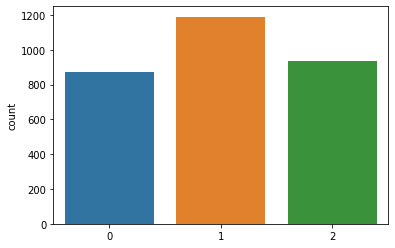

In [15]:
import seaborn as sns
sns.countplot(predicted)

In [16]:
output = le.inverse_transform(predicted)
output

array(['neutral', 'negative', 'neutral', ..., 'positive', 'neutral',
       'neutral'], dtype=object)

In [0]:
outputdf = df_BERT_64
outputdf["output"] = output

In [0]:
# outputdf.to_csv("drive/My Drive/67.csv")

In [19]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
precision_recall_fscore_support(outputdf["Sentiment"], l["Sentiment"][:-1], average="macro"), accuracy_score(outputdf["Sentiment"], l["Sentiment"][:-1])

((0.6782804462871205, 0.6960534570406008, 0.6844081334326786, None),
 0.6785595198399467)